# SyriaTel Customer Churn Prediction

### Problem Overview

SyriaTel, a telecommunications company, is experiencing a significant customer churn problem, with many clients opting to leave and switch to competitors. To tackle this challenge, SyriaTel seeks to create a predictive model to anticipate customer churn. By doing so, the company hopes to better understand the key factors driving customer departures, improve retention rates, and ultimately boost profitability.

### Goals

1.Identify the primary factors leading to customer churn.

2.Build a model to predict which customers are most likely to leave.

3.Offer recommendations to proactively retain customers and reduce churn.


### Success Criteria

1.A reliable customer churn prediction model with high accuracy and a recall score of at least 0.75.

2.Identification of critical features that contribute to customer churn.

3.Practical recommendations for SyriaTel to lower churn rates and enhance customer loyalty.

### Data Understanding
The dataset for this project is sourced from Kaggle (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) and was obtained directly from their repository.

This dataset is a single, comprehensive collection of data relevant to customer churn analysis. It includes various features that provide insights into customer behavior and interactions with the service provider. Its value lies in its thorough coverage of factors like service usage, billing details, and customer support engagements—all of which are critical for predicting churn.

By analyzing these features, we can develop models to identify customers at risk of leaving, allowing the company to take early action to retain them.

#### First we import libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
file_path = r"C:\Users\PC\Documents\Flatiron\dsc-data-science-env-config\syriatelchurn.csv"
df = pd.read_csv(file_path)


In [3]:
# viewing the first 5 and last 5 rows of data frame
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
# summary of statistical information for a DataFrame's numerical columns.

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#Display the shape of the dataframe

print(f"The number of rows: {len(df)}")
print(f"The number of columns: {df.shape[1]}")

The number of rows: 3333
The number of columns: 21


In [6]:
# summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Identify Categorical and Numerical Columns

categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']

# Print the results

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['state', 'phone number', 'international plan', 'voice mail plan']
Numerical columns: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


### Categorical Features:
state: The state where the customer resides.

phone number: The phone number of the customer.

international plan: Whether the customer has an international plan (Yes or No).

voice mail plan: Whether the customer has a voice mail plan (Yes or No).

### Numeric Features:
area code: The area code associated with the customer's phone number.

account length: The number of days the customer has been an account holder.

number vmail messages: The number of voice mail messages received by the customer.

total day minutes: The total number of minutes the customer used during the day.

total day calls: The total number of calls made by the customer during the day.

total day charge: The total charges incurred by the customer for daytime usage.

total eve minutes: The total number of minutes the customer used during the evening.

total eve calls: The total number of calls made by the customer during the evening.

total eve charge: The total charges incurred by the customer for evening usage.

total night minutes: The total number of minutes the customer used during the night.

total night calls: The total number of calls made by the customer during the night.

total night charge: The total charges incurred by the customer for nighttime usage.

total intl minutes: The total number of international minutes used by the customer.

total intl calls: The total number of international calls made by the customer.

total intl charge: The total charges incurred by the customer for international usage.

customer service calls: The number of customer service calls made by the customer.

### Data Preparation

In this section, we undertake several important steps to prepare the dataset for building predictive models. This process includes-:

a) Data Cleaning, where we address any missing values, handle outliers, and check for duplicates to improve the overall quality of the dataset. 
 
 b) Data Exploration, where we perform exploratory data analysis (EDA) to uncover patterns, correlations, and insights within the data, helping us to better understand the relationships between different variables. 
 
c) Feature Engineering, where we create new features or transform existing ones, optimizing them to improve the performance of our predictive models. 

These steps are crucial in ensuring the data is well-prepared for accurate and reliable modeling."

#### a) Data Cleaning, 
Addressing any missing values, handle outliers, and check for duplicates to improve the overall quality of the dataset. 

 Missing values

In [8]:
def checking_missing_values(df):
    
    missing_values = df.isnull().sum()
    if missing_values.any():
        missing_percent = (missing_values / len(df)) * 100
        missing_report = pd.DataFrame({
            'Missing Values': missing_values,
            'Missing Percentage (%)': missing_percent
        }).sort_values(by='Missing Values', ascending=False)
        return missing_report
    return "No missing values detected"

In [9]:
checking_missing_values(df)

'No missing values detected'

 Duplicate rows

In [10]:
def checking_duplicate_rows(df):
    
    duplicate_rows = df[df.duplicated()]
    if not duplicate_rows.empty:
        print("Duplicate rows found:")
        return duplicate_rows
    else:
        return "No duplicate rows found."

In [11]:
checking_duplicate_rows(df)

'No duplicate rows found.'

Handling outliers

In [12]:
# Function to visualize outliers using boxplots
def visualize_outliers(dataframe):
    # Selecting numerical columns from the dataframe
    numerical_columns = dataframe.select_dtypes(include=np.number).columns
    
    # Defining grid layout for subplots
    n_cols = 2
    n_rows = (len(numerical_columns) + 1) // n_cols
    
    # Creating the subplot layout with adjusted figure size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6,2 * n_rows))
    axes = axes.flatten()  # Flatten axes for easier iteration
    
    # Plotting boxplots for each numerical column
    for idx, column in enumerate(numerical_columns):
        sns.boxplot(data=dataframe, y=column, ax=axes[idx], color='skyblue')
        axes[idx].set_title(f'Outlier Detection in {column}', fontsize=12)
        axes[idx].set_ylabel('Values')
    
    # Remove unused subplots
    if len(numerical_columns) < len(axes):
        for extra_ax in axes[len(numerical_columns):]:
            fig.delaxes(extra_ax)
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

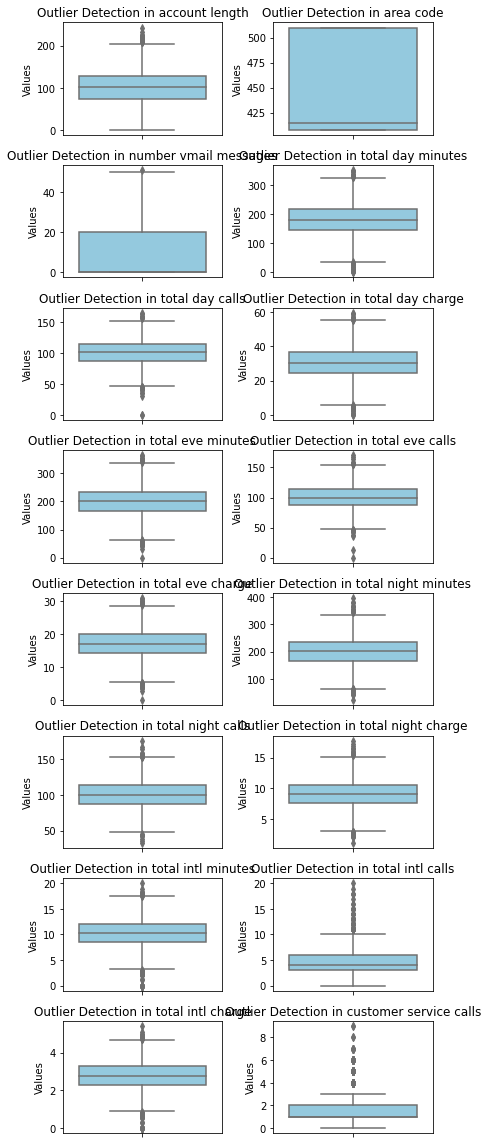

In [13]:
visualize_outliers(df)

It is evident that many features contain outliers, which can introduce disturbance into the data. To enhance the model's predictive accuracy, we will address this issue by removing data points that fall beyond three standard deviations, thereby reducing the impact of these extreme values.

In [14]:
# Removing outliers
def remove_outliers(df, z_threshold=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_threshold) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
remove_outliers(df)
print(df.shape)

(3169, 21)


After removing outliers, the number of rows in the dataset has now been reduced to 3169 

 From the business understanding, the area code represents a categorical value rather than a numerical one, despite being stored as an integer. Therefore, we need to convert the area code column to a categorical data type by changing it to an object."

In [15]:
# Convert the data type of the "area code" column to object
df["area code"] = df["area code"].astype(object)

Dropping column phone number for it is irrelevant to our analysis:

In [16]:
# Dropping the column 'phone number'
df = df.drop("phone number", axis=1)

After data cleaning, print the number of rows and columns  being used to conduct analysis

In [17]:
print(f"The number of rows: {len(df)}")
print(f"The number of columns: {df.shape[1]}")

The number of rows: 3169
The number of columns: 20


#### b) Data Exploration / Explanatory Data Analysis (EDA)
Performing exploratory data analysis (EDA) to uncover patterns, correlations, and insights within the data, helping us to better understand the relationships between different variables.

##### Churn distribution

In [18]:
df['churn'].unique().tolist()

[False, True]

The churn variable indicates whether a customer has churned or not, with two possible outcomes: 'True' for customers who have churned and 'False' for those who have not.

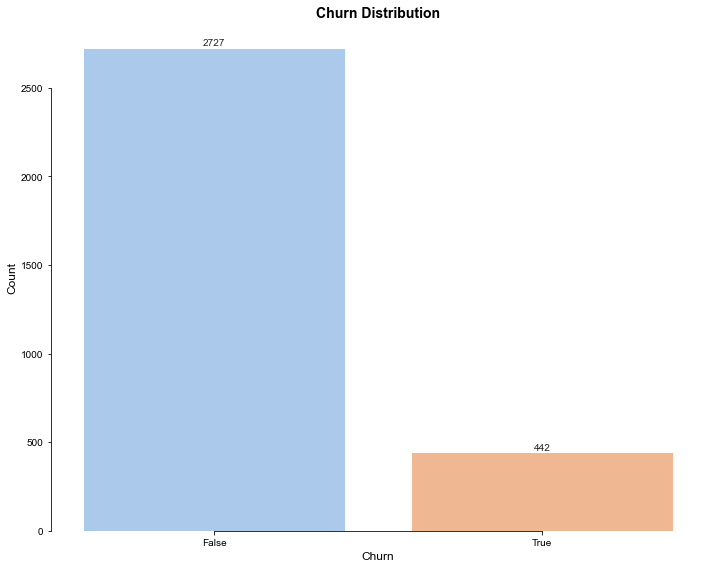

In [19]:
# Set up the plot 

fig, ax = plt.subplots(figsize=(10,8))
sns.set_style("ticks")

# Create the bar chart

sns.countplot(x="churn", data=df, ax=ax, palette="pastel")

# Add labels and title

ax.set_xlabel("Churn", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Churn Distribution", fontsize=14, fontweight='bold')

# Annotate the bars with count values

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
    
# Finalize and show the plot

sns.despine(trim=True)
plt.tight_layout()
plt.show()

Among the 3169 customers, 442 have churned, meaning they have cancelled their contracts with the company, while 2727 have remained. This distribution highlights a noticeable class imbalance, which needs to be addressed before modelling, as it could lead to skewed or inaccurate predictions.

##### Numerical Features Distribution

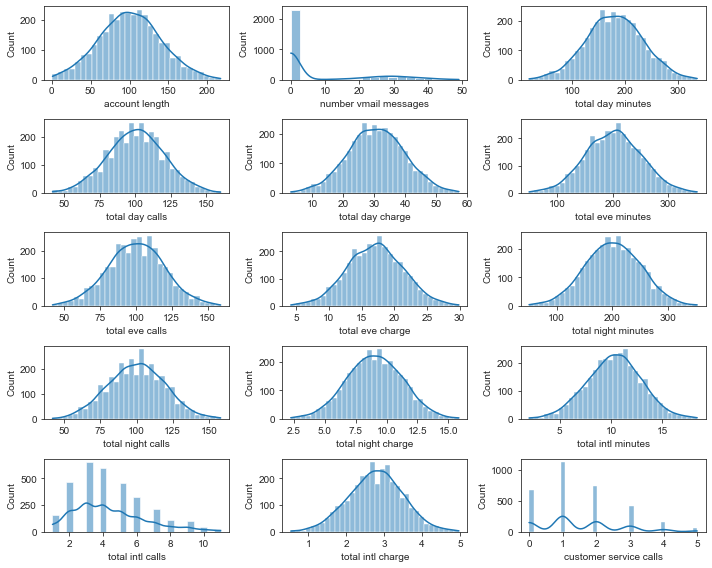

In [20]:
# List of numeric features
numeric_features = [
    'account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
    'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
    'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls'
]

# Determine number of subplots
num_features = len(numeric_features)
nrows, ncols = divmod(num_features, 3)
nrows += 1 if ncols > 0 else 0  # Adjust for uneven last row

# Create subplots grid
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(10, 8))

# Plot histograms for each numeric feature
for idx, feature in enumerate(numeric_features):
    row, col = divmod(idx, 3)
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Count")

# Remove unused subplots if any
for idx in range(num_features, nrows * 3):
    fig.delaxes(axes.flatten()[idx])

# Tight layout for spacing and show the plot
plt.tight_layout()
plt.show()

The majority of the features are normally distributed, especially usage-related ones (minutes, calls, charges), which suggests uniform customer behavior in these aspects.
Features like "number of voicemail messages," "total intl calls," and "customer service calls" show skewed distributions, indicating that only a minority of customers engage in these activities frequently.

##### Cartegorical Features Distribution

In [21]:
# First finding out the number of states
st = df['state'].unique()
num_states = len(st)

print("Unique states:", st)
print("Number of unique states:", num_states)

Unique states: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'AZ' 'GA'
 'AK' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM' 'NV'
 'DC' 'MD' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Number of unique states: 51


In [22]:
def plot_categorical_feature(df, feature):
   
    # Get the value counts and sort them in descending order
    counts = df[feature].value_counts().sort_values(ascending=False)

    # Generate a color palette with a gradient effect
    colors = sns.color_palette("Blues_r", len(counts))

    # Create the plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x=counts.index, y=counts.values, palette=colors)

    # Add titles and labels
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90)

    # Annotate the bars with their respective counts
    for i, count in enumerate(counts.values):
        plt.text(i, count, f"{count}", ha='center', va='bottom', fontsize=10)

    # Optimize layout and display the plot
    plt.tight_layout()
    plt.show()

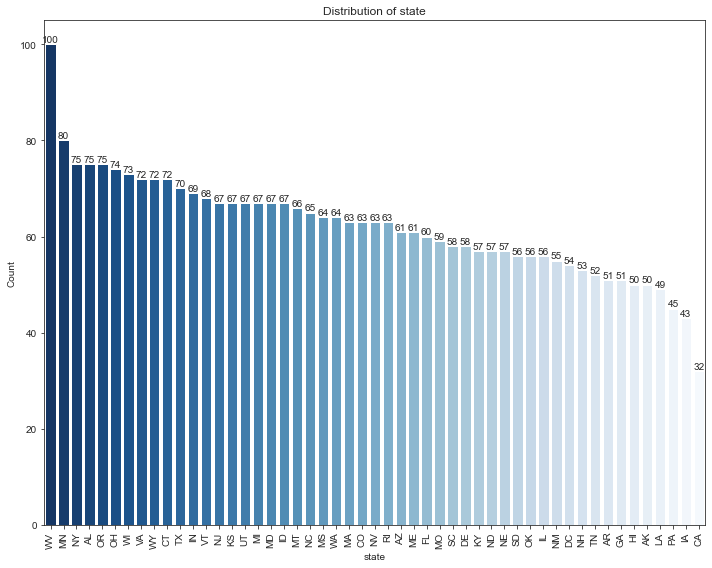

In [23]:
plot_categorical_feature(df, 'state' )

From the distibution the top 5 areas that have the most customers are : West Virginia WV, Minnesota MN, New York NY, Ohio OH and AL Atlanta.

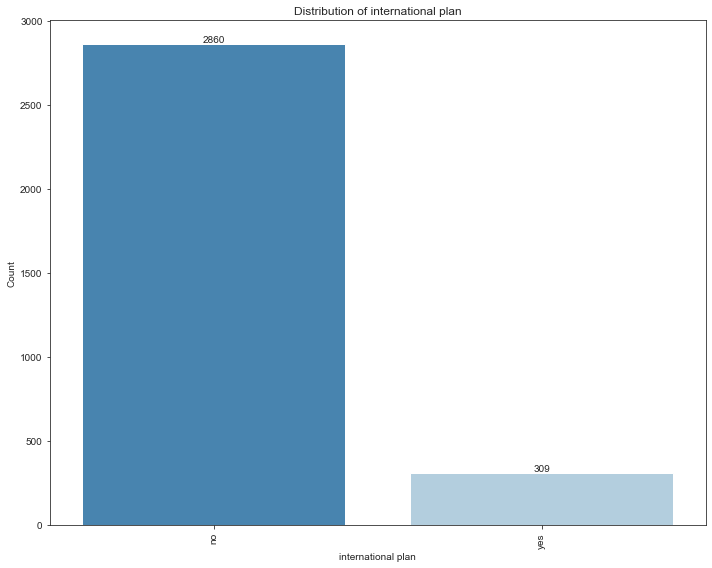

In [24]:
plot_categorical_feature(df, 'international plan' )

Out of 3169 customers, 309 have an international plan

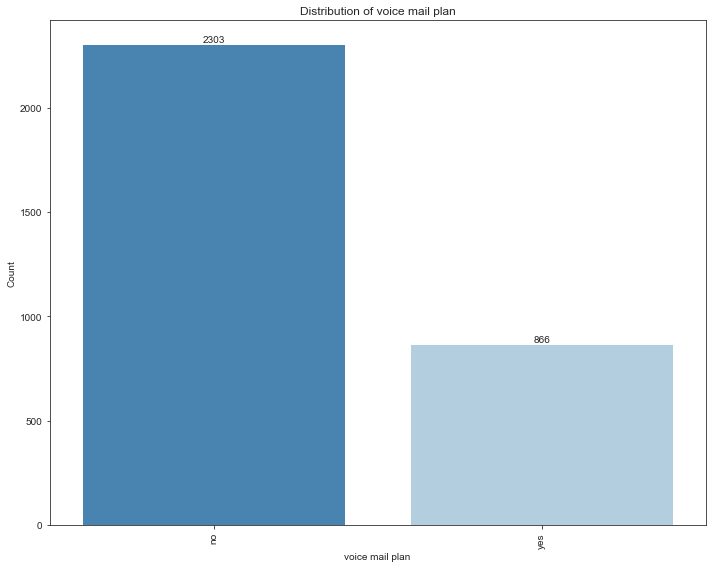

In [25]:
plot_categorical_feature(df, 'voice mail plan' )

Out of 3169 customers, 866 have a voice mail plan

##### Distribution of Categorical Features by churn rate

In [26]:
def plot_categorical_by_churn(data, feature, title):
    """
    Plots the distribution of a categorical feature by churn in the dataset.

    Args:
        data (pd.DataFrame): The input DataFrame containing the data.
        feature (str): The categorical feature to plot.
        title (str): The title of the plot.

    Returns:
        None
    """
    plt.figure(figsize=(10, 8))

    # Calculate the sum of churn for each category in the feature and sort them
    churn_counts = data.groupby(feature)["churn"].sum().sort_values(ascending=False)
    sorted_categories = churn_counts.index

    # Plot the count plot with churn as hue
    sns.countplot(x=feature, hue="churn", data=data, order=sorted_categories)

    # Customize plot aesthetics
    plt.xticks(rotation=90)
    plt.title(title, fontsize=18)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Churn", loc="upper right")
    plt.tight_layout()

    # Display the plot
    plt.show()

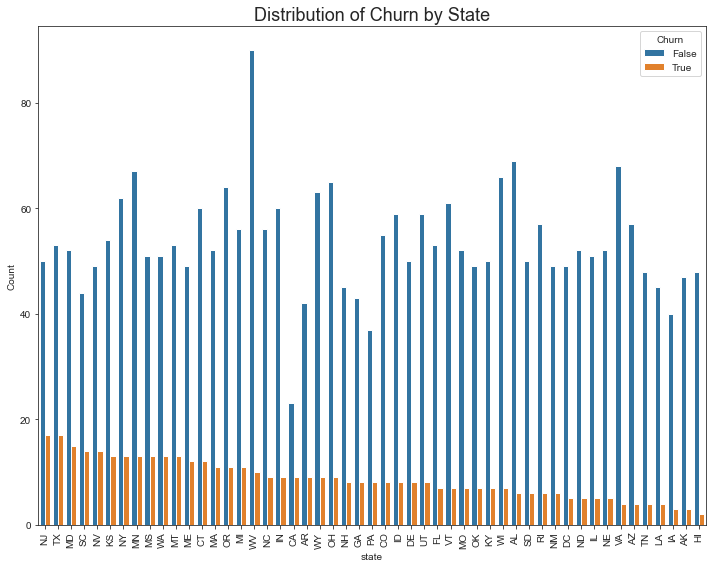

In [27]:
plot_categorical_by_churn(df, 'state', 'Distribution of Churn by State')

The top 5 states with the highest churn (Orange bars) are: 
WV (West Virginia), NJ (New Jersey), CA (California), TX (Texas) & OH (Ohio)

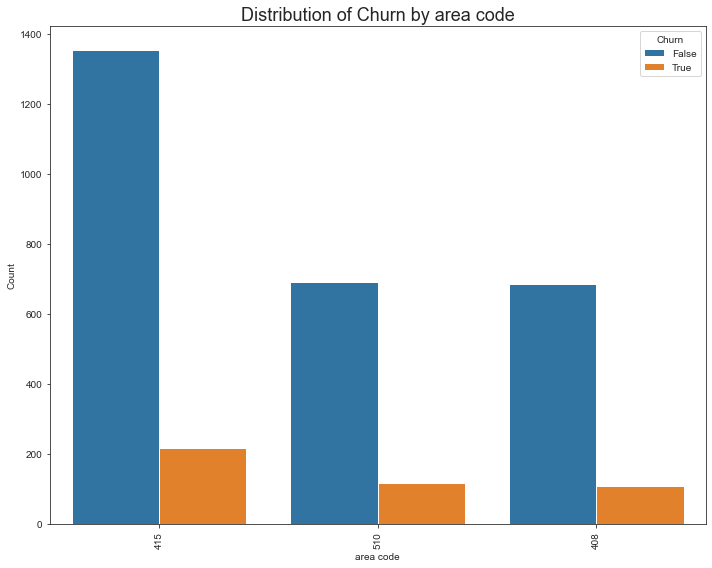

In [28]:
plot_categorical_by_churn(df, 'area code', 'Distribution of Churn by area code')

The area code where the most churned customers is area code 415

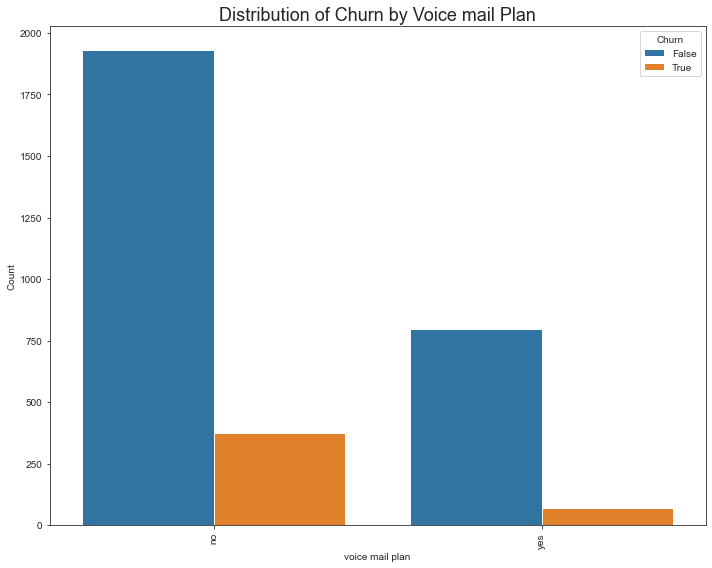

In [29]:
plot_categorical_by_churn(df, 'voice mail plan', 'Distribution of Churn by Voice mail Plan')

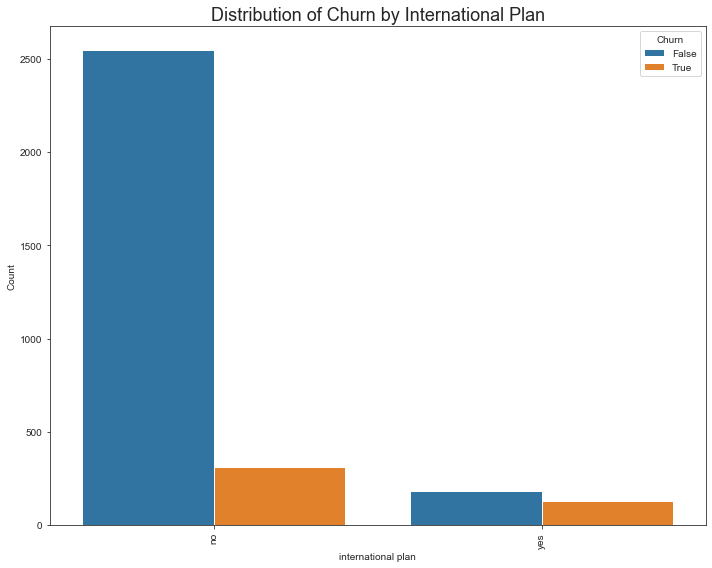

In [30]:
plot_categorical_by_churn(df, 'international plan', 'Distribution of Churn by International Plan')

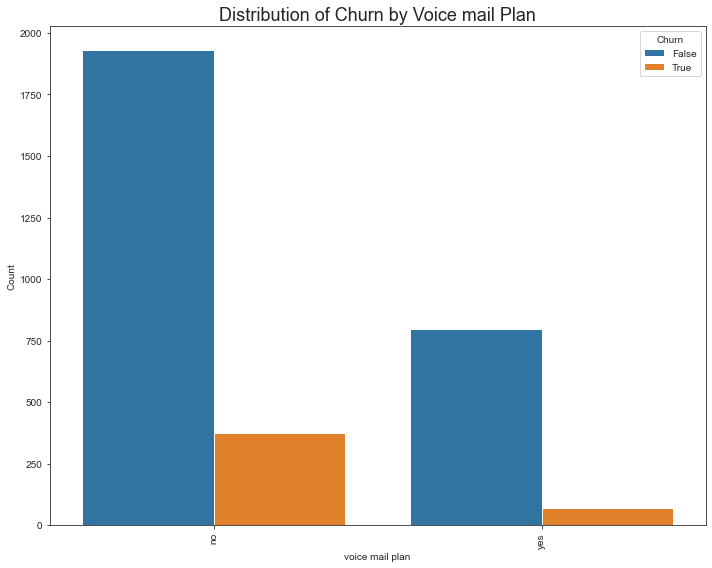

In [31]:
plot_categorical_by_churn(df, 'voice mail plan', 'Distribution of Churn by Voice mail Plan')

##### Distribution of Churn by Day, Evening & Internationalcharges

In [32]:
def plot_churn_kde(df, x_column, charge_label):
    """
    Plots the KDE (Kernel Density Estimate) of a feature, split by churn status.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_column (str): The column name to plot (e.g., "total day minutes").
        charge_label (str): A label describing the charge type (e.g., "Day", "Night").

    Returns:
        None
    """
    plt.figure(figsize=(8, 4))
    
    # Plot the KDE with churn as the hue, filling the area under the curves
    sns.kdeplot(data=df, x=x_column, hue='churn', fill=True, palette='coolwarm')
    
    # Set axis labels and title
    plt.xlabel(f'Total {charge_label} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_label} Charges')
    
    # Display the plot
    plt.show()

Churn by day charges

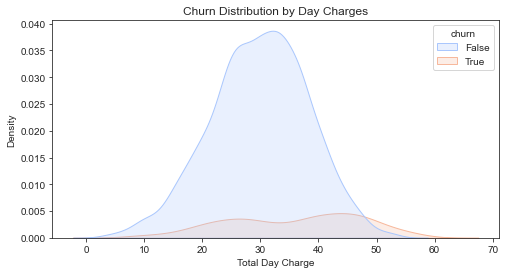

In [33]:
plot_churn_kde(df, 'total day charge', 'Day')

Churn by Evening charges

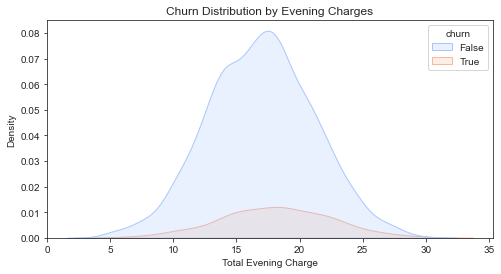

In [34]:
plot_churn_kde(df, 'total eve charge', 'Evening')

Churn by international Charges

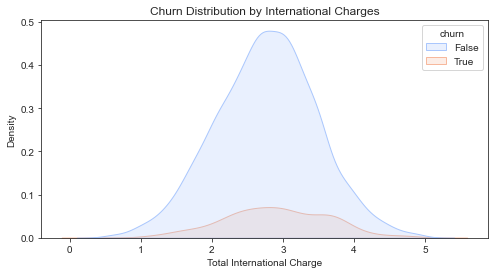

In [35]:
plot_churn_kde(df, 'total intl charge', 'International')

##### Area Code Distribution

In [36]:
df['area code'].unique().tolist()

[415, 408, 510]

Since area code has 3 distributions " 415, 408, 510", this can be represented in a pie chart to show the distribution

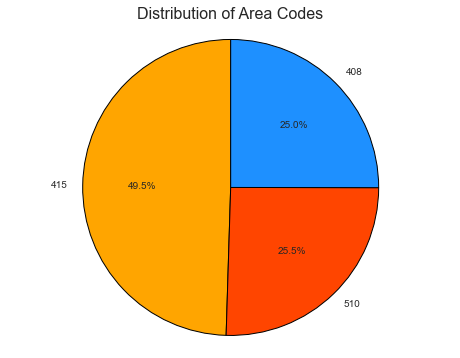

In [37]:
# Calculate the count of each area code
area_code_counts = df["area code"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
color_palette = ["#FFA500", "#FF4500", "#1E90FF"]  # Custom color choices: Orange, Red, Blue

plt.pie(area_code_counts, 
        labels=area_code_counts.index, 
        colors=color_palette, 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'})  # Optional: adds a black border around the wedges

plt.title("Distribution of Area Codes", fontsize=16)

# Ensures the pie chart is a circle
plt.axis("equal")

# Show the plot
plt.show()

#### c) Correlation Analysis

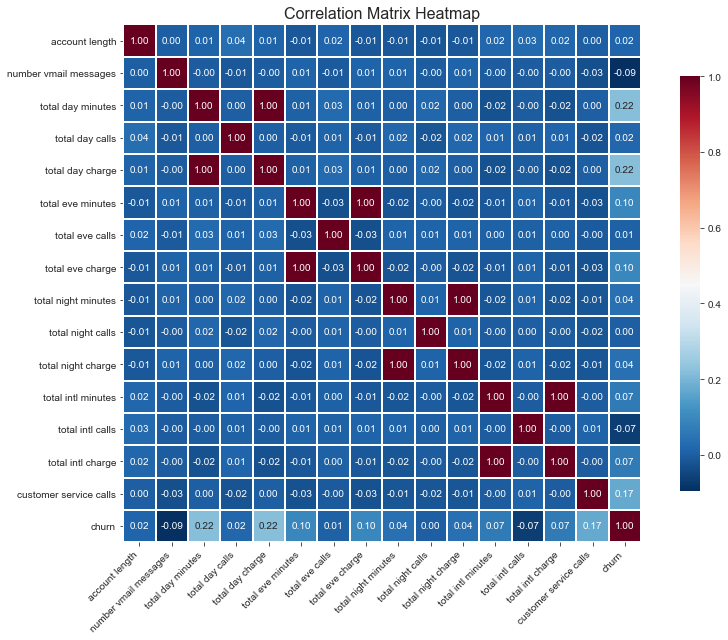

In [38]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the heatmap plot
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(
    data=corr_matrix, 
    annot=True, 
    cmap="RdBu_r", 
    fmt=".2f", 
    linewidths=1, 
    square=True, 
    cbar_kws={"shrink": 0.8}
)

# Add the title and adjust layout
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Display the heatmap
plt.show()

From the correlation heatmap, the variable churn has the highest correlation with total day minutes and total day charge (0.22), indicating that customers who spend more time on calls during the day are slightly more likely to churn.
customer service calls also shows some positive correlation with churn (0.17), implying that customers who call customer service more frequently are more likely to churn.
Many of the features have weak or negligible correlation with churn, such as account length, total intl minutes, and number vmail messages, with correlation coefficients close to 0. This indicates that these features do not significantly contribute to predicting churn.
Total day charge and total day minutes, Total eve charge and total eve minutes , Total night charge and total night minutes, Total int charge and total int minutes are highly correlated and might introduce redundancy in a model.

##### Addressing Multicollinearity

The goal is to drop highly correlated features that are > than 0.90. This is so as to prevent redundancy in the model

In [39]:
# Compute absolute correlation matrix
corr_matrix = df.corr().abs()

# Apply an upper triangle mask to the matrix
upper_triangle_mask = np.triu(np.ones(corr_matrix.shape, dtype=bool))
upper_tri = corr_matrix.where(~upper_triangle_mask)

# Identify columns with high correlation (r > 0.90)
high_corr_features = [col for col in upper_tri.columns if any(upper_tri[col] > 0.90)]

# Remove highly correlated features from the DataFrame
df.drop(columns=high_corr_features, inplace=True)